In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob

In [38]:
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [39]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)

df.head()

,filepath,gender
0,./crop_data/female/female_0.jpg,female
1,./crop_data/female/female_1.jpg,female
2,./crop_data/female/female_2.jpg,female
3,./crop_data/female/female_3.jpg,female
4,./crop_data/female/female_4.jpg,female


In [40]:
df.shape

(2599, 2)

In [41]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [42]:
df['dimension'] = df['filepath'].apply(get_size) # armazena as dimensões da imagem

In [43]:
df.head()

,filepath,gender,dimension
0,./crop_data/female/female_0.jpg,female,273
1,./crop_data/female/female_1.jpg,female,182
2,./crop_data/female/female_2.jpg,female,273
3,./crop_data/female/female_3.jpg,female,81
4,./crop_data/female/female_4.jpg,female,122


# Visualização gráfica

In [45]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    1732
male       867
Name: count, dtype: int64

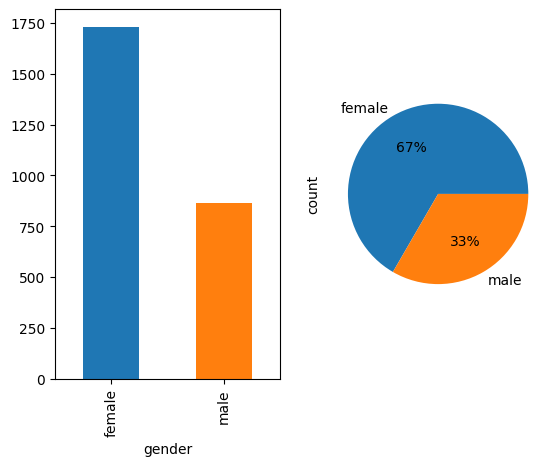

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar', ax=ax[0], color=['#1f77b4', '#ff7f0e'])
dist_gender.plot(kind='pie', ax=ax[1], autopct='%0.0f%%', colors=['#1f77b4', '#ff7f0e'])

plt.show()


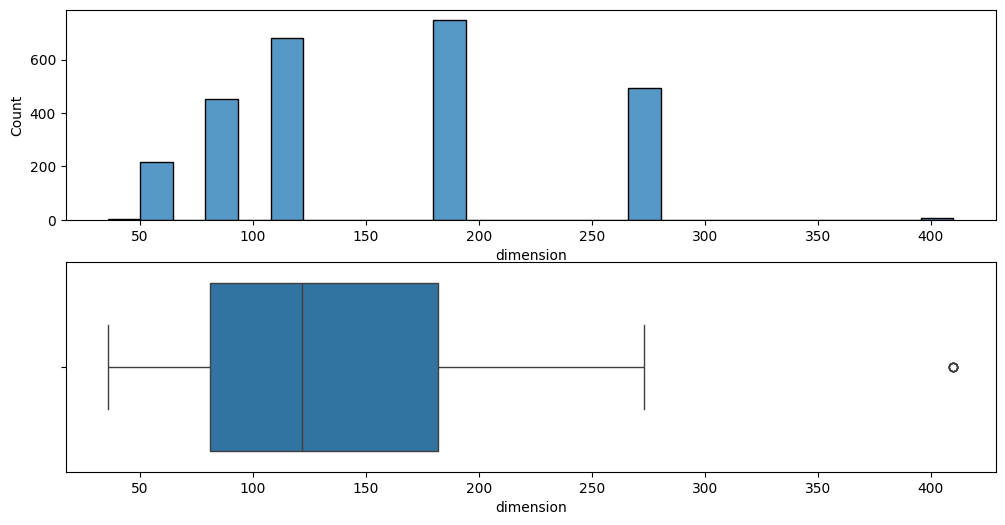

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(x=df['dimension'])
plt.show()

In [55]:
df_filter = df.query('dimension > 60')
df_filter.shape

(2381, 3)

In [56]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.674087
male      0.325913
Name: proportion, dtype: float64

## Redimensionamento das imagens

In [58]:
def structuring(path):
    try:
        img = cv2.imread(path) # BGR
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        # Redimensionando todas as imagens em um array 100 x 100
        size = gray.shape[0]
        if size >= 100:
            # Shrink
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # Enlarge
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # Flatten Image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    except:
        return None

In [61]:
df_filtered = df_filter.copy()

df_filtered['data'] = df_filtered['filepath'].apply(structuring)
df_filtered.head()

,filepath,gender,dimension,data
0,./crop_data/female/female_0.jpg,female,273,"[200, 189, 188, 181, 184, 185, 179, 176, 189, ..."
1,./crop_data/female/female_1.jpg,female,182,"[31, 25, 35, 25, 31, 29, 30, 31, 34, 34, 49, 7..."
2,./crop_data/female/female_2.jpg,female,273,"[21, 19, 24, 25, 24, 28, 33, 46, 61, 68, 77, 9..."
3,./crop_data/female/female_3.jpg,female,81,"[34, 27, 28, 32, 30, 27, 22, 21, 25, 29, 29, 2..."
4,./crop_data/female/female_4.jpg,female,122,"[13, 15, 12, 14, 17, 24, 26, 25, 35, 41, 39, 3..."


In [62]:
data = df_filter['data'].apply(pd.Series)

In [64]:
data.columns = [f"pixel_{i}" for i in data.columns]
data

,pixel_pixel_0,pixel_pixel_1,pixel_pixel_2,pixel_pixel_3,pixel_pixel_4,pixel_pixel_5,pixel_pixel_6,pixel_pixel_7,pixel_pixel_8,pixel_pixel_9,...,pixel_pixel_9990,pixel_pixel_9991,pixel_pixel_9992,pixel_pixel_9993,pixel_pixel_9994,pixel_pixel_9995,pixel_pixel_9996,pixel_pixel_9997,pixel_pixel_9998,pixel_pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,31,25,35,25,31,29,30,31,34,34,...,45,27,22,30,22,35,20,35,65,19
2,21,19,24,25,24,28,33,46,61,68,...,195,195,194,194,194,195,195,195,195,195
3,34,27,28,32,30,27,22,21,25,29,...,6,5,11,19,16,3,3,15,30,35
4,13,15,12,14,17,24,26,25,35,41,...,167,172,183,194,211,212,214,219,221,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2,3,3,3,2,3,4,3,4,6,...,163,163,161,157,154,158,164,166,164,163
863,31,28,27,28,29,29,29,28,27,27,...,180,180,179,184,203,216,220,227,231,226
864,37,43,47,43,31,21,19,17,16,17,...,123,124,127,130,130,125,123,122,123,124
865,121,122,127,125,111,84,68,64,67,73,...,131,135,138,142,146,148,151,158,163,163


## Normalização de dados

In [65]:
data = data/255.0 
data['gender'] = df_filter['gender']
data.head()

,pixel_pixel_0,pixel_pixel_1,pixel_pixel_2,pixel_pixel_3,pixel_pixel_4,pixel_pixel_5,pixel_pixel_6,pixel_pixel_7,pixel_pixel_8,pixel_pixel_9,...,pixel_pixel_9991,pixel_pixel_9992,pixel_pixel_9993,pixel_pixel_9994,pixel_pixel_9995,pixel_pixel_9996,pixel_pixel_9997,pixel_pixel_9998,pixel_pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.082353,0.074510,0.094118,0.098039,0.094118,0.109804,0.129412,0.180392,0.239216,0.266667,...,0.764706,0.760784,0.760784,0.760784,0.764706,0.764706,0.764706,0.764706,0.764706,female
3,0.133333,0.105882,0.109804,0.125490,0.117647,0.105882,0.086275,0.082353,0.098039,0.113725,...,0.019608,0.043137,0.074510,0.062745,0.011765,0.011765,0.058824,0.117647,0.137255,female
4,0.050980,0.058824,0.047059,0.054902,0.066667,0.094118,0.101961,0.098039,0.137255,0.160784,...,0.674510,0.717647,0.760784,0.827451,0.831373,0.839216,0.858824,0.866667,0.725490,female


In [66]:
data.duplicated().sum()

np.int64(30)

In [67]:
data.dropna()

,pixel_pixel_0,pixel_pixel_1,pixel_pixel_2,pixel_pixel_3,pixel_pixel_4,pixel_pixel_5,pixel_pixel_6,pixel_pixel_7,pixel_pixel_8,pixel_pixel_9,...,pixel_pixel_9991,pixel_pixel_9992,pixel_pixel_9993,pixel_pixel_9994,pixel_pixel_9995,pixel_pixel_9996,pixel_pixel_9997,pixel_pixel_9998,pixel_pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.082353,0.074510,0.094118,0.098039,0.094118,0.109804,0.129412,0.180392,0.239216,0.266667,...,0.764706,0.760784,0.760784,0.760784,0.764706,0.764706,0.764706,0.764706,0.764706,female
3,0.133333,0.105882,0.109804,0.125490,0.117647,0.105882,0.086275,0.082353,0.098039,0.113725,...,0.019608,0.043137,0.074510,0.062745,0.011765,0.011765,0.058824,0.117647,0.137255,female
4,0.050980,0.058824,0.047059,0.054902,0.066667,0.094118,0.101961,0.098039,0.137255,0.160784,...,0.674510,0.717647,0.760784,0.827451,0.831373,0.839216,0.858824,0.866667,0.725490,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.007843,0.011765,0.011765,0.011765,0.007843,0.011765,0.015686,0.011765,0.015686,0.023529,...,0.639216,0.631373,0.615686,0.603922,0.619608,0.643137,0.650980,0.643137,0.639216,male
863,0.121569,0.109804,0.105882,0.109804,0.113725,0.113725,0.113725,0.109804,0.105882,0.105882,...,0.705882,0.701961,0.721569,0.796078,0.847059,0.862745,0.890196,0.905882,0.886275,male
864,0.145098,0.168627,0.184314,0.168627,0.121569,0.082353,0.074510,0.066667,0.062745,0.066667,...,0.486275,0.498039,0.509804,0.509804,0.490196,0.482353,0.478431,0.482353,0.486275,male
865,0.474510,0.478431,0.498039,0.490196,0.435294,0.329412,0.266667,0.250980,0.262745,0.286275,...,0.529412,0.541176,0.556863,0.572549,0.580392,0.592157,0.619608,0.639216,0.639216,male


## Salvando a análise

In [68]:
import pickle

In [69]:
pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb'))